In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
triplets=pd.read_table("kaggle_visible_evaluation_triplets.txt")

In [3]:
triplets.columns

Index(['fd50c4007b68a3737fe052d5a4f78ce8aa117f3d', 'SOBONKR12A58A7A7E0', '1'], dtype='object')

In [4]:
triplets=triplets.rename(columns={'fd50c4007b68a3737fe052d5a4f78ce8aa117f3d':'user_id','SOBONKR12A58A7A7E0':'song_id','1':'no.of times listened'})

In [5]:
triplets

,user_id,song_id,no.of times listened
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOXLOQG12AF72A2D55,1
...,...,...,...
1450927,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1
1450928,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2
1450929,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2
1450930,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2


In [6]:
triplets.shape

(1450932, 3)

In [7]:
unique_tracks=pd.read_csv('unique_tracks.txt',sep='<SEP>',names=['track_id','song_id','artist_name','release'])

In [8]:
unique_tracks

,track_id,song_id,artist_name,release
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos QuerÃ©s
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens
...,...,...,...,...
999995,TRYYYUS12903CD2DF0,SOTXAME12AB018F136,Kiko Navarro,O Samba Da Vida
999996,TRYYYJO128F426DA37,SOXQYIQ12A8C137FBB,Kuldeep Manak,Jago Chhadeo
999997,TRYYYMG128F4260ECA,SOHODZI12A8C137BB3,Gabriel Le Mar,Novemba
999998,TRYYYDJ128F9310A21,SOLXGOR12A81C21EB7,Elude,Faraday


In [9]:
songs=pd.read_csv('kaggle_songs.txt')

In [10]:
songs.columns=['song_id']

In [11]:
songs


,song_id
0,SOAAADE12A6D4F80CC 2
1,SOAAADF12A8C13DF62 3
2,SOAAADZ12A8C1334FB 4
3,SOAAAFI12A6D4F9C66 5
4,SOAAAGK12AB0189572 6
...,...
386207,SOZZZRJ12AB0187A75 386209
386208,SOZZZRV12A8C1361F1 386210
386209,SOZZZSR12AB01854CD 386211
386210,SOZZZWD12A6D4F6624 386212


In [12]:
users=pd.read_csv('kaggle_users.txt')

In [13]:
users.columns=['user_id']

In [14]:
users

,user_id
0,d7083f5e1d50c264277d624340edaaf3dc16095b
1,d68dc6fc25248234590d7668a11e3335534ae4b4
2,9be82340a8b5ef32357fe5af957ccd54736ece95
3,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8
4,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62
...,...
109994,07f2f354a2a4390624e0d04e4a555ef67e98f673
109995,fe752b1aa2a12dbc203c37b70881d88481c655f1
109996,ab79461415bb9db956def3a897886d0754ddddfb
109997,fc072bde2043756ea30ff07e4a5311e34825b4df


In [15]:
print(triplets.shape)
print(unique_tracks.shape)

(1450932, 3)
(1000000, 4)


In [16]:
triplets

,user_id,song_id,no.of times listened
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOXLOQG12AF72A2D55,1
...,...,...,...
1450927,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1
1450928,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2
1450929,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2
1450930,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2


In [17]:
unique_tracks

,track_id,song_id,artist_name,release
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos QuerÃ©s
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens
...,...,...,...,...
999995,TRYYYUS12903CD2DF0,SOTXAME12AB018F136,Kiko Navarro,O Samba Da Vida
999996,TRYYYJO128F426DA37,SOXQYIQ12A8C137FBB,Kuldeep Manak,Jago Chhadeo
999997,TRYYYMG128F4260ECA,SOHODZI12A8C137BB3,Gabriel Le Mar,Novemba
999998,TRYYYDJ128F9310A21,SOLXGOR12A81C21EB7,Elude,Faraday


In [18]:
df=pd.merge(triplets,unique_tracks,on='song_id')
df

,user_id,song_id,no.of times listened,track_id,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
1,248378ac27e1745d6a9d59392b7dc5b02a6186a6,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,7c49f3e11a6fce79ae60b44df2a3edcf6eb2e163,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
3,8061f61372876878c2d67bc49b3ddbd2c83d69e2,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
4,d47c829c4ff6270f9ab82ca36b2805951b62a208,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
...,...,...,...,...,...,...
1491946,9d2f78e2bda5a004879d3ee53ee7de5cdf99c730,SOIDWNE12A8C13E669,1,TRZHWHD128F42B9D11,Our Broken Garden,The Blinding
1491947,987b654b09b239f7c47751e0cfaa2990834cbb55,SOATNWN12A6D4F826F,1,TRNBQWA128F145DB74,Emilio,Como A Nadie
1491948,987b654b09b239f7c47751e0cfaa2990834cbb55,SOGMCFE12AB018A3A1,3,TRIWGAI12903CDF710,Morbid Angel,Victorious March Of Reign The Conqueror
1491949,fc072bde2043756ea30ff07e4a5311e34825b4df,SOBAOTU12A6D4F7A68,1,TRMPODL128F4228DE1,Gus Gus,Call of the Wild


In [19]:
#Removing track_id column as it is not needed for us 
df.drop('track_id', axis=1, inplace=True)

In [20]:
df

,user_id,song_id,no.of times listened,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
1,248378ac27e1745d6a9d59392b7dc5b02a6186a6,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,7c49f3e11a6fce79ae60b44df2a3edcf6eb2e163,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
3,8061f61372876878c2d67bc49b3ddbd2c83d69e2,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
4,d47c829c4ff6270f9ab82ca36b2805951b62a208,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
...,...,...,...,...,...
1491946,9d2f78e2bda5a004879d3ee53ee7de5cdf99c730,SOIDWNE12A8C13E669,1,Our Broken Garden,The Blinding
1491947,987b654b09b239f7c47751e0cfaa2990834cbb55,SOATNWN12A6D4F826F,1,Emilio,Como A Nadie
1491948,987b654b09b239f7c47751e0cfaa2990834cbb55,SOGMCFE12AB018A3A1,3,Morbid Angel,Victorious March Of Reign The Conqueror
1491949,fc072bde2043756ea30ff07e4a5311e34825b4df,SOBAOTU12A6D4F7A68,1,Gus Gus,Call of the Wild


In [21]:
df.describe()
#it shows the frequency of the songs

,no.of times listened
count,1.491951e+06
mean,3.179720e+00
std,7.015025e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


In [22]:
df.dtypes

user_id                 object
song_id                 object
no.of times listened     int64
artist_name             object
release                 object
dtype: object

In [23]:
print('Total no.of songs :',df['song_id'].nunique())
print('Total no.of users :',df['user_id'].nunique())
print('Total no.of artists :',df['artist_name'].nunique())

Total no.of songs : 163206
Total no.of users : 110000
Total no.of artists : 28367


### checking for null values  

In [24]:

print(df.isna().sum(),"\n")
print('percentage of null values'"\n\n\n",df.isna().sum()/len(df)*100)

user_id                 0
song_id                 0
no.of times listened    0
artist_name             0
release                 1
dtype: int64 

percentage of null values


 user_id                 0.000000
song_id                 0.000000
no.of times listened    0.000000
artist_name             0.000000
release                 0.000067
dtype: float64


As there is only 1 null value in release feature we can drop that column 

In [25]:
df.dropna(axis=0,how='any',inplace=True)

In [26]:
#checking for null values after dropping null values 
print(df.isna().sum(),"\n")
print('percentage of null values'"\n\n",df.isna().sum()/len(df)*100)

user_id                 0
song_id                 0
no.of times listened    0
artist_name             0
release                 0
dtype: int64 

percentage of null values

 user_id                 0.0
song_id                 0.0
no.of times listened    0.0
artist_name             0.0
release                 0.0
dtype: float64


### checking for duplicates in out dataframe

In [27]:

df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1491946    False
1491947    False
1491948    False
1491949    False
1491950    False
Length: 1491950, dtype: bool

### dropping duplicates

In [28]:

df.drop_duplicates(keep='first',inplace=True)

In [29]:
 df.shape

(1456563, 5)

### sorting columns based on no.of times listened 

In [30]:

df.sort_values('no.of times listened',ascending=True)

,user_id,song_id,no.of times listened,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
893572,23614884aa75fe96d99a36a775aeda1b531830b2,SOFLGUD12A6701F7FD,1,Frou Frou,Holding Out For A Hero
893574,d2e8d8aeb220950b4ddfc7c5e648d439a9965eed,SOFLGUD12A6701F7FD,1,Frou Frou,Holding Out For A Hero
893575,ff499594b217036334d3b300e03f9c61ae7b9df9,SOFLGUD12A6701F7FD,1,Frou Frou,Holding Out For A Hero
893576,40f25f9031233352e9e9c5d2e52aaae4dafd1ba9,SOFLGUD12A6701F7FD,1,Frou Frou,Holding Out For A Hero
...,...,...,...,...,...
1424225,a86e68128c6a48d3392db22ce1151a3bdccf5fcf,SOFVLYV12A8C145D8F,537,Us3,Believe In Yourself
526513,69ad6b6a1d14d740eb8c2f013a19c1f8048cecde,SONGOJV12AF729AEBD,582,Queen,Somebody To Love
641625,2d9ea6058d0872ccdc5b1c5c685758bb9c55f0a3,SOAOXTG12A67021AA7,597,Ms. Dynamite / Kymani Marley,Seed Will Grow
679629,a1cc4d088600df2db42e6a305974675ffe8c905d,SOPMHHE12AB01845F6,646,The Beach Boys,What Is a Young Girl Made of


In [31]:
#No.of times songs are played 
print(df[['no.of times listened']].value_counts())

no.of times listened
1                       842217
2                       214701
3                        96189
5                        73737
4                        55407
                         ...  
262                          1
187                          1
259                          1
189                          1
923                          1
Length: 299, dtype: int64


### Total number of artists

In [32]:
 
print("total no.of artists are :",df['artist_name'].nunique())

total no.of artists are : 28366


### Total number of unique releases

In [33]:
df['release'].unique()

array(['Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)',
       'Tive Sim', 'Catch You Baby (Steve Pitron & Max Sanna Radio Edit)',
       ..., 'Victorious March Of Reign The Conqueror', 'Call of the Wild',
       'Snoozer'], dtype=object)

In [34]:
df['release'].nunique()

137674

### There are total of 28366 artists in the given data set

In [35]:
df['artist_name'].unique()

array(['Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner',
       'Cartola', 'Lonnie Gordon', ..., 'P.Paul Fenech', 'Mystic Rhythms',
       'H.e.a.t'], dtype=object)

## Top 100 popular songs 

In [36]:
popular_df=df[['artist_name','no.of times listened','release']]

In [37]:
popular_df.sort_values(by='no.of times listened',ascending=False)

,artist_name,no.of times listened,release
1491875,Kilgore,923,Drop The Hammer (Album Version)
679629,The Beach Boys,646,What Is a Young Girl Made of
641625,Ms. Dynamite / Kymani Marley,597,Seed Will Grow
526513,Queen,582,Somebody To Love
1424225,Us3,537,Believe In Yourself
...,...,...,...
668679,Dean Evenson,1,Mossing Around
668680,Dean Evenson,1,Mossing Around
668681,Dean Evenson,1,Mossing Around
668682,Dean Evenson,1,Mossing Around


### These  are the top 100 songs based on popularity

In [39]:
song_popularity=popular_df.groupby(['release'])['no.of times listened'].sum().sort_values(ascending=False)

In [40]:
song_popularity

release
You're The One                                                         35737
Undo                                                                   33179
Revelry                                                                24359
Sehr kosmisch                                                          19454
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)    17115
                                                                       ...  
Hush (Album Version)                                                       1
Penny To My Name (Album Version)                                           1
That Was Then                                                              1
Penny We                                                                   1
Esta Es Una Noche De Rock&Roll                                             1
Name: no.of times listened, Length: 137674, dtype: int64

###  we can see the no.of songs played per person

In [41]:
songs_per_person=df.groupby(['user_id'])['no.of times listened'].sum()


In [42]:
songs_per_person

user_id
00007a02388c208ea7176479f6ae06f8224355b3     13
00014a76ed063e1a749171a253bca9d9a0ff1782     24
00015189668691680bb1a2e58afde1541ec92ced    101
0001ff7aa2667c8d8b945317b88adaed1c0b9dc2     12
00020fcd8b01986a6a85b896ccde6c49f35142ad     44
                                           ... 
fffdef71f13352e9cff769f1d96f5ccf90f8955e     10
fffe29116f96c97b47a5dabdd406784ad0ba6f30     10
fffe5b73c50c72ca9c54947efac1fcacf59c4a17    108
fffed0bee753cd78494011b8b55dafd4f5c7e5ff     76
ffff07d7d9bb187aa58c7b81b3d3f35e7cf7c0ee     42
Name: no.of times listened, Length: 110000, dtype: int64

In [43]:
df

,user_id,song_id,no.of times listened,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
1,248378ac27e1745d6a9d59392b7dc5b02a6186a6,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,7c49f3e11a6fce79ae60b44df2a3edcf6eb2e163,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
3,8061f61372876878c2d67bc49b3ddbd2c83d69e2,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
4,d47c829c4ff6270f9ab82ca36b2805951b62a208,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
...,...,...,...,...,...
1491946,9d2f78e2bda5a004879d3ee53ee7de5cdf99c730,SOIDWNE12A8C13E669,1,Our Broken Garden,The Blinding
1491947,987b654b09b239f7c47751e0cfaa2990834cbb55,SOATNWN12A6D4F826F,1,Emilio,Como A Nadie
1491948,987b654b09b239f7c47751e0cfaa2990834cbb55,SOGMCFE12AB018A3A1,3,Morbid Angel,Victorious March Of Reign The Conqueror
1491949,fc072bde2043756ea30ff07e4a5311e34825b4df,SOBAOTU12A6D4F7A68,1,Gus Gus,Call of the Wild


In [44]:
songs_per_person.sort_values(ascending=False)

user_id
090b841eaf56d343a26625c2c6d08b823927bc4f    1305
938c2632d43eeadb8a83a7cc254d014f9cea6afe    1280
1c5aa998482a40abfd020759e7d757eb6c510e72    1200
c6150292374fb1dad89982367b3245dd5004c718    1192
5a9375e46a7e9b869058c7bc0e820e00d77f3e0b    1184
                                            ... 
dc152fb9b0b72648dc10e6ed6effb3b148aa316a       5
717d34613ad93f04ea187a0fbe444561e96d1c84       5
fa6894e991dba63dd2d5c5465c1e0f77ab62770b       5
342bf803141c8a84ccb04dae940477d8621ac73a       5
89b07df379827a871fb1e991e14f0918bf4ebc6b       5
Name: no.of times listened, Length: 110000, dtype: int64

In [45]:
songs_per_person.describe()

count    110000.000000
mean         42.186709
std          53.487815
min           5.000000
25%          13.000000
50%          26.000000
75%          50.000000
max        1305.000000
Name: no.of times listened, dtype: float64

###  Maximum songs listened by a person are 1305 
### Minimum songs listened by person are 5

In [46]:
songs_per_person_df=songs_per_person.head(10)

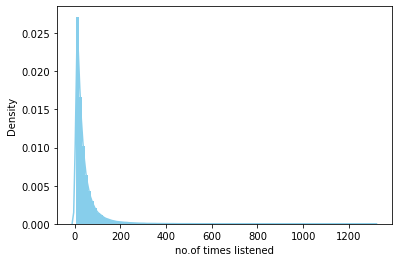

In [47]:
ax = sns.distplot(songs_per_person,bins=100,kde=True,color='skyblue',hist_kws={"linewidth": 20,'alpha':1})

By this plot we can say that many people listened songs 0 to 200 times. 

## Distribution of frequency

[Text(0.5, 0, 'no.of times listened'), Text(0, 0.5, 'density')]

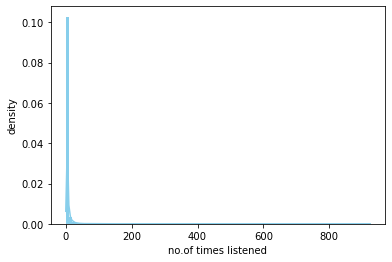

In [48]:
ax = sns.distplot(df['no.of times listened'],bins=100,kde=True,color='skyblue',hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='no.of times listened', ylabel='density')


### By this plot we can say that there are only few people listened songs more than 100 times and many people listenes songs less times

<AxesSubplot:xlabel='no.of times listened'>

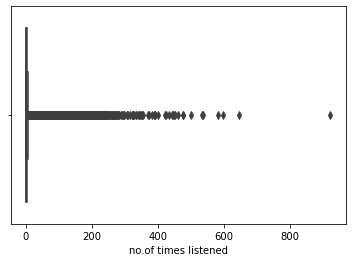

In [49]:
sns.boxplot(df['no.of times listened'])

By this plot we can say that there are some outliers.
we can remove the outliers by IQR method.

### Artist popularity

In [83]:
artist_popularity=popular_df.groupby(['artist_name'])['no.of times listened'].sum().sort_values(ascending=False)
artist_popularity

artist_name
Kings Of Leon                35857
Dwight Yoakam                35687
BjÃ¶rk                       35210
Coldplay                     32135
Florence + The Machine       28224
                             ...  
Beto y sus Canarios              1
L'Arc-en-ciel                    1
Nate Dogg feat. Big Chuck        1
Treklang Reggae                  1
Home Run                         1
Name: no.of times listened, Length: 28366, dtype: int64

In [78]:
k=pd.DataFrame(artist_popularity)
k

,artist_name
0,Barry Tuckwell/Academy of St Martin-in-the-Fie...
1,Barry Tuckwell/Academy of St Martin-in-the-Fie...
2,Barry Tuckwell/Academy of St Martin-in-the-Fie...
3,Barry Tuckwell/Academy of St Martin-in-the-Fie...
4,Barry Tuckwell/Academy of St Martin-in-the-Fie...
...,...
1491946,Our Broken Garden
1491947,Emilio
1491948,Morbid Angel
1491949,Gus Gus


In [84]:
k=pd.DataFrame(artist_popularity)
k.reset_index(inplace=True)

In [87]:
k.dtypes


artist_name             object
no.of times listened     int64
dtype: object

In [88]:
k

,artist_name,no.of times listened
0,Kings Of Leon,35857
1,Dwight Yoakam,35687
2,BjÃ¶rk,35210
3,Coldplay,32135
4,Florence + The Machine,28224
...,...,...
28361,Beto y sus Canarios,1
28362,L'Arc-en-ciel,1
28363,Nate Dogg feat. Big Chuck,1
28364,Treklang Reggae,1


In [95]:
fig,ax=plt.subplots(figsize=(10,10))
plt.bar(x=k['artist_name'],height=k['no.of times listened'])

<BarContainer object of 28366 artists>

ValueError: 
Jack Orsen & Taktlo$$
                   ^
Expected end of text, found '$'  (at char 19), (line:1, col:20)

<Figure size 720x720 with 1 Axes>

In [54]:
df

,user_id,song_id,no.of times listened,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
1,248378ac27e1745d6a9d59392b7dc5b02a6186a6,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,7c49f3e11a6fce79ae60b44df2a3edcf6eb2e163,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
3,8061f61372876878c2d67bc49b3ddbd2c83d69e2,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
4,d47c829c4ff6270f9ab82ca36b2805951b62a208,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
...,...,...,...,...,...
1491946,9d2f78e2bda5a004879d3ee53ee7de5cdf99c730,SOIDWNE12A8C13E669,1,Our Broken Garden,The Blinding
1491947,987b654b09b239f7c47751e0cfaa2990834cbb55,SOATNWN12A6D4F826F,1,Emilio,Como A Nadie
1491948,987b654b09b239f7c47751e0cfaa2990834cbb55,SOGMCFE12AB018A3A1,3,Morbid Angel,Victorious March Of Reign The Conqueror
1491949,fc072bde2043756ea30ff07e4a5311e34825b4df,SOBAOTU12A6D4F7A68,1,Gus Gus,Call of the Wild


In [55]:
df['user_id'].nunique()

110000

In [56]:
df['song_id'].nunique()

163205

### Removing all the duplicate values from out Dataset

In [57]:
song=df.drop_duplicates(['user_id','song_id','artist_name'])
song=song.reset_index(drop=True)

In [58]:
song.head()

,user_id,song_id,no.of times listened,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
1,248378ac27e1745d6a9d59392b7dc5b02a6186a6,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,7c49f3e11a6fce79ae60b44df2a3edcf6eb2e163,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
3,8061f61372876878c2d67bc49b3ddbd2c83d69e2,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
4,d47c829c4ff6270f9ab82ca36b2805951b62a208,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...


In [59]:
song.shape

(1451759, 5)

In [60]:
song['user_id'].shape

(1451759,)

In [61]:
song['song_id'].shape

(1451759,)

## Creating a Matrix 
### Usually we are converting all our data into numbers so that our model can be trained .

In [62]:
song_pivot=song.head(10000).pivot(index='user_id',columns='song_id',values='no.of times listened')
song_pivot=song_pivot.fillna(0)
song_pivot.shape


(8582, 22)

In [63]:
song_pivot.head()

song_id,SOACRJG12A8C137A8D,SOATCSU12A8C13393A,SODQZCY12A6D4F9D11,SODSKZZ12AB0188524,SOEFCDJ12AB0185FA0,SOEGIYH12A6D4FC0E3,SOFLJQZ12A6D4FADA6,SOFRQTD12A81C233C0,SOHEKND12A8AE481D0,SOHTKMO12AB01843B0,...,SONJVYU12A8AE44F9E,SONZTNP12A8C1321DF,SOPFVWP12A6D4FC636,SOPSVVG12A8C13B444,SOSOUKN12A8C13AB79,SOUQERE12A58A75633,SOUVUHC12A67020E3B,SOVVLKF12A8C1424F0,SOXLOQG12AF72A2D55,SOZPZGN12A8C135B45
user_id,,,,,,,,,,,,,,,,,,,,,
0003d5245414b9c6244046543a06f601bfc97949,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000dd7137b511a0c6e45880de551c6a7019ee4c3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001db6e9e8f569b3d7d24b49db576d179f290fd2,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0029bec66fe7ce2a396c2f78b35aedcd2b9d3e4a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002dfbc3c073b55a64a4abab34c0ca1f13897f1c,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Importing libraries needed for machine learning algorithm

In [64]:
from sklearn.neighbors import NearestNeighbors
knn=NearestNeighbors(n_neighbors=10,metric='cosine')
model_user=knn.fit(song_pivot)

In [65]:
def findRecomendationsUsers(model, matrix, data, query_index):
    distances,indices = model.kneighbors([matrix.iloc[query_index, :]], n_neighbors = 10)
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print("Searching recommendation for user: ", matrix.index[query_index])
        else:
            rows = data.loc[data['user_id'] == matrix.index[indices.flatten()[i]] ]
            for item in rows.values:      
              print("\n  User: ", item[0])
              print("    Play Count: ", item[2])  
              print("    Song: ",  item[3])

### Here we are creating a function so that we can get recomendations.

In [69]:
query_index = np.random.choice(song_pivot.shape[0])
query_index

4720

### Finding recomendations

In [67]:
findRecomendationsUsers(model_user, song_pivot, df, query_index)


Searching recommendation for user:  9f8c700d1cacbb968b3e4bd123fe361c054d33ca

  User:  e3ccdd29331e3b49862d3a5bd391111478bf9d26
    Play Count:  1
    Song:  Cartola

  User:  e3ccdd29331e3b49862d3a5bd391111478bf9d26
    Play Count:  1
    Song:  Jacky Terrasson

  User:  e3ccdd29331e3b49862d3a5bd391111478bf9d26
    Play Count:  1
    Song:  Santigold

  User:  e3ccdd29331e3b49862d3a5bd391111478bf9d26
    Play Count:  1
    Song:  BlÃ¸f

  User:  e3ccdd29331e3b49862d3a5bd391111478bf9d26
    Play Count:  1
    Song:  MGMT

  User:  e3ccdd29331e3b49862d3a5bd391111478bf9d26
    Play Count:  1
    Song:  Straight No Chaser

  User:  e3ccdd29331e3b49862d3a5bd391111478bf9d26
    Play Count:  1
    Song:  Santogold

  User:  e3ccdd29331e3b49862d3a5bd391111478bf9d26
    Play Count:  2
    Song:  Santogold

  User:  e3f904d45fa6cf4b8619d824c89f282742061f04
    Play Count:  4
    Song:  Cartola

  User:  e3f904d45fa6cf4b8619d824c89f282742061f04
    Play Count:  1
    Song:  Iyaz

  User:  e3f904